In [48]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import joblib
warnings.filterwarnings('ignore')

In [2]:
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv'
df = pd.read_csv(dataset_path)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [3]:
df = df.rename(columns={'medv': 'price'})

In [4]:
df = df.drop(df.index[-1])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df = df.astype(float)

In [6]:
ndf = df.nunique()
ndf

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
price      229
dtype: int64

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64


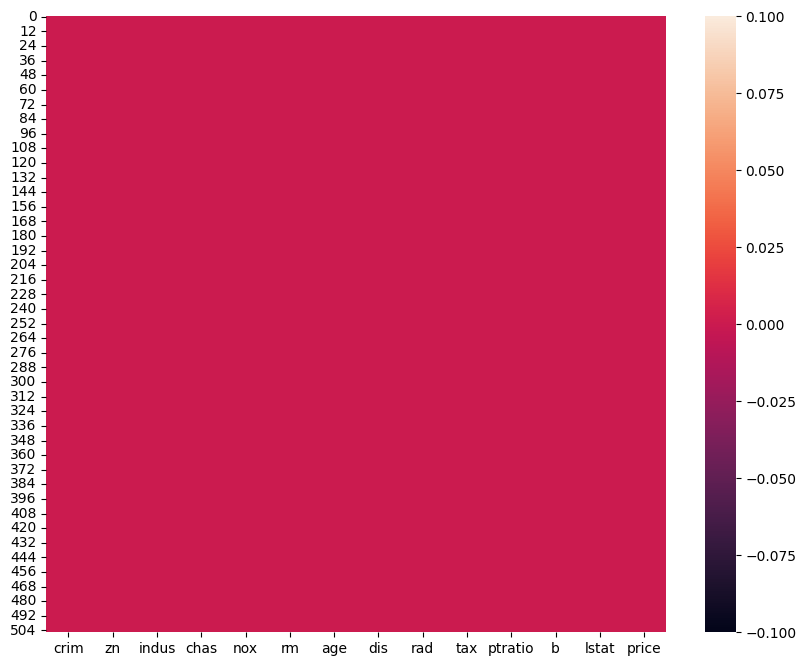

In [7]:
# controllo se ci sono valori nulli
print(df.isnull().sum())

# HEATMAP dei valori nulli
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

In [8]:
data_types = df.dtypes
non_unique_counts = df.nunique()

# non necessario in caso voglia visualizzare tutto
count_limit = 1000
filtered_data = non_unique_counts[non_unique_counts < count_limit]

feature_info = pd.DataFrame({'Data Type': data_types.loc[filtered_data.index], 'Non-Unique Count': filtered_data.values})
print(feature_info)

        Data Type  Non-Unique Count
crim      float64               504
zn        float64                26
indus     float64                76
chas      float64                 2
nox       float64                81
rm        float64               446
age       float64               356
dis       float64               412
rad       float64                 9
tax       float64                66
ptratio   float64                46
b         float64               357
lstat     float64               455
price     float64               229


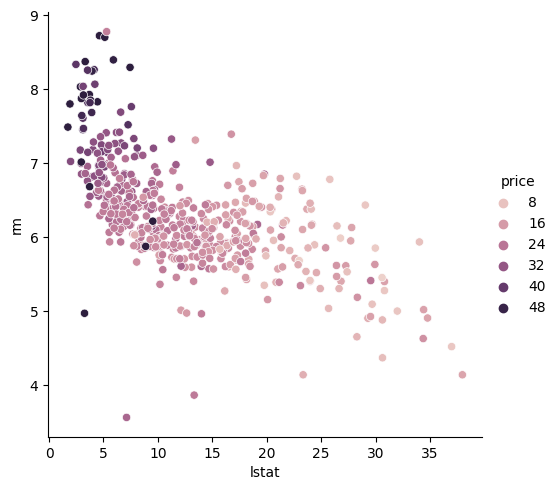

In [77]:
sns.relplot(x='lstat', y='rm', hue='price', data=df)
plt.show()

In [9]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['price']
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False).nlargest(10)
top_features = sorted_correlation.index.tolist()
sorted_correlation

price      1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
Name: price, dtype: float64

In [47]:
top_features[1:5]

['lstat', 'rm', 'ptratio', 'indus']

In [21]:
X = df[top_features[1:5]]
y = df[df.columns[-1]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [35]:
# Regression function for metric
from sklearn.metrics import r2_score, mean_squared_error

def regression_train_metrics(model, estimators=False):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)

    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
    train_rmse = np.sqrt(mse)
    train_r2 = r2_score(y_true=y_train, y_pred=y_pred_train)

    if estimators:
        feat_list = []
        imp_list = []
        importance = model.feature_importances_
        feature_importance = dict(zip(X.columns, importance))
        sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
        print("Feature importance")
        for feature, importance in sorted_feature_importance:
            feat_list.append(feature)
            imp_list.append(importance)
            print(f"{feature}: {importance}")
        print("\n")

    print(f"Model: {model}")

    print("Train metrics")
    print(f"Mean Squared Error: {train_mse}")
    print(f"Root Mean Squared Error: {train_rmse}")
    print(f"R-squared Score: {train_r2}")
    
    print("\nTest metrics")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared Score: {r2}")


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

regression_train_metrics(RandomForestRegressor(), estimators=True)

Feature importance
lstat: 0.4602190861689212
rm: 0.4575425326512568
ptratio: 0.04253952558692041
indus: 0.03969885559290143


Model: RandomForestRegressor()
Train metrics
Mean Squared Error: 2.0156055965346518
Root Mean Squared Error: 4.1150624253716845
R-squared Score: 0.9757507921493368

Test metrics
Mean Squared Error: 16.93373876470589
Root Mean Squared Error: 4.1150624253716845
R-squared Score: 0.8106943284186252


In [30]:
regression_train_metrics(LinearRegression())

Model: LinearRegression()
Train metrics
Mean Squared Error: 25.087070378834003
Root Mean Squared Error: 5.977822189235145
R-squared Score: 0.6981842156885962

Test metrics
Mean Squared Error: 35.734358126112056
Root Mean Squared Error: 5.977822189235145
R-squared Score: 0.6005184231557682


In [37]:
regression_train_metrics(DecisionTreeRegressor(), estimators=True)

Feature importance
rm: 0.5979903329204234
lstat: 0.3141948815317833
ptratio: 0.04608715684277235
indus: 0.041727628705020864


Model: DecisionTreeRegressor()
Train metrics
Mean Squared Error: 0.0
Root Mean Squared Error: 5.88798211048007
R-squared Score: 1.0

Test metrics
Mean Squared Error: 34.66833333333334
Root Mean Squared Error: 5.88798211048007
R-squared Score: 0.6124357287268204


In [38]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred = model.predict(X_test)

In [39]:
feat_list = []
imp_list = []
importance = model.feature_importances_
feature_importance = dict(zip(X.columns, importance))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Feature importance")
for feature, importance in sorted_feature_importance:
    feat_list.append(feature)
    imp_list.append(importance)
    print(f"{feature}: {importance}")

Feature importance
lstat: 0.4689256313332345
rm: 0.44538013415325534
ptratio: 0.04641000567137002
indus: 0.03928422884214008


Text(0.5, 1.0, 'Feature Importance')

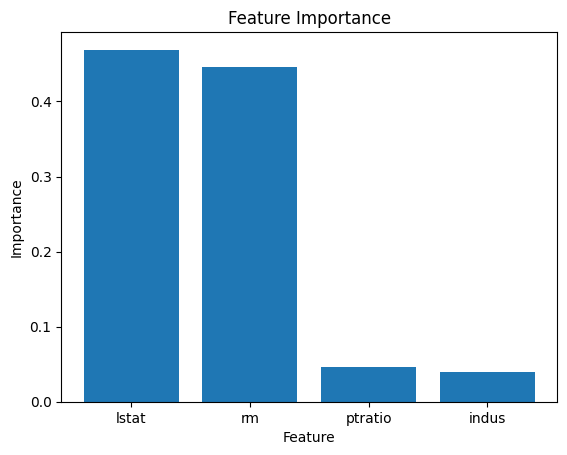

In [40]:
plt.bar(feat_list, imp_list)

# Set the labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')

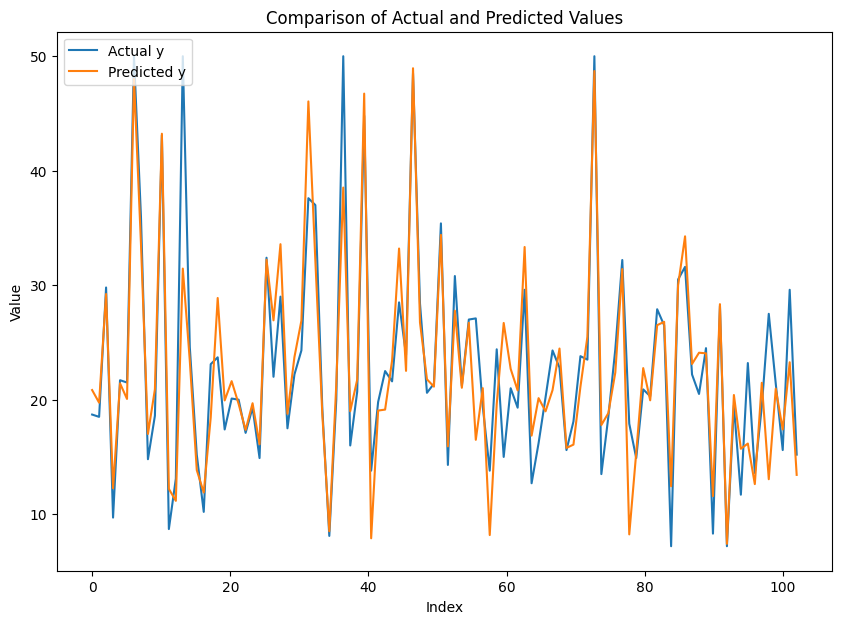

In [43]:
length = y_pred.shape[0]
x = np.linspace(0, length, length)

plt.figure(figsize=(10, 7))
plt.plot(x, y_test, label='Actual y')
plt.plot(x, y_pred, label="Predicted y")
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values');

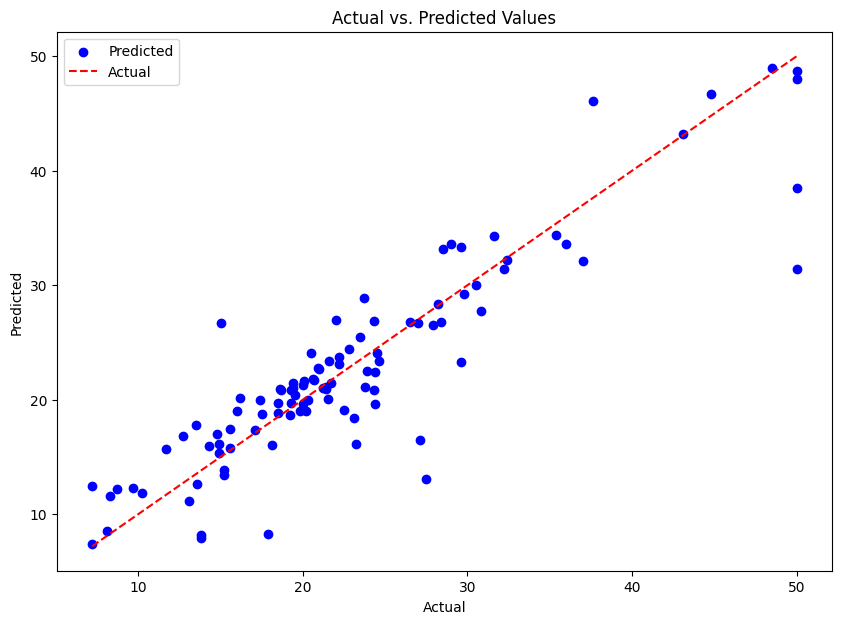

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, c='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [45]:
joblib.dump(model, filename="immobili_model.pkl")

['immobili_model.pkl']

In [51]:
df.to_csv("immobilidataset.csv", index=False)

PIPELINE

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [71]:
scaler = StandardScaler()
classifier = LinearRegression()

In [72]:
model_pipe = Pipeline([
                       ('Scaling and standardize data', scaler), 
                       ('Classifier', classifier)
                      ])
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaling and standardize data', StandardScaler()),
                ('Classifier', LinearRegression())])

In [74]:
print(f'Train Accuracy: {model_pipe.score(X_train, y_train):.3f}')
print(f'Test Accuracy : {model_pipe.score(X_test, y_test):.3f}')

Train Accuracy: 0.698
Test Accuracy : 0.601


In [ ]:
#joblib.dump(model_pipe,'immobili_pipe.pkl')